Data Shape: (6607, 20)
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Qual

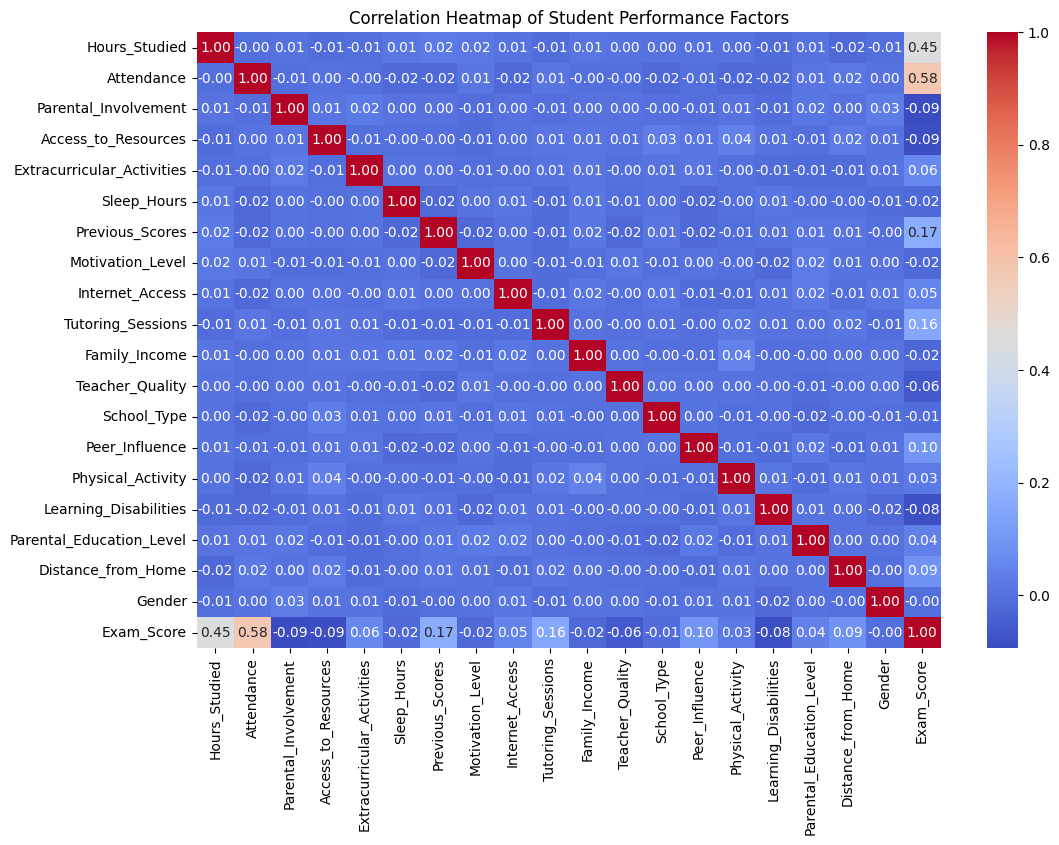

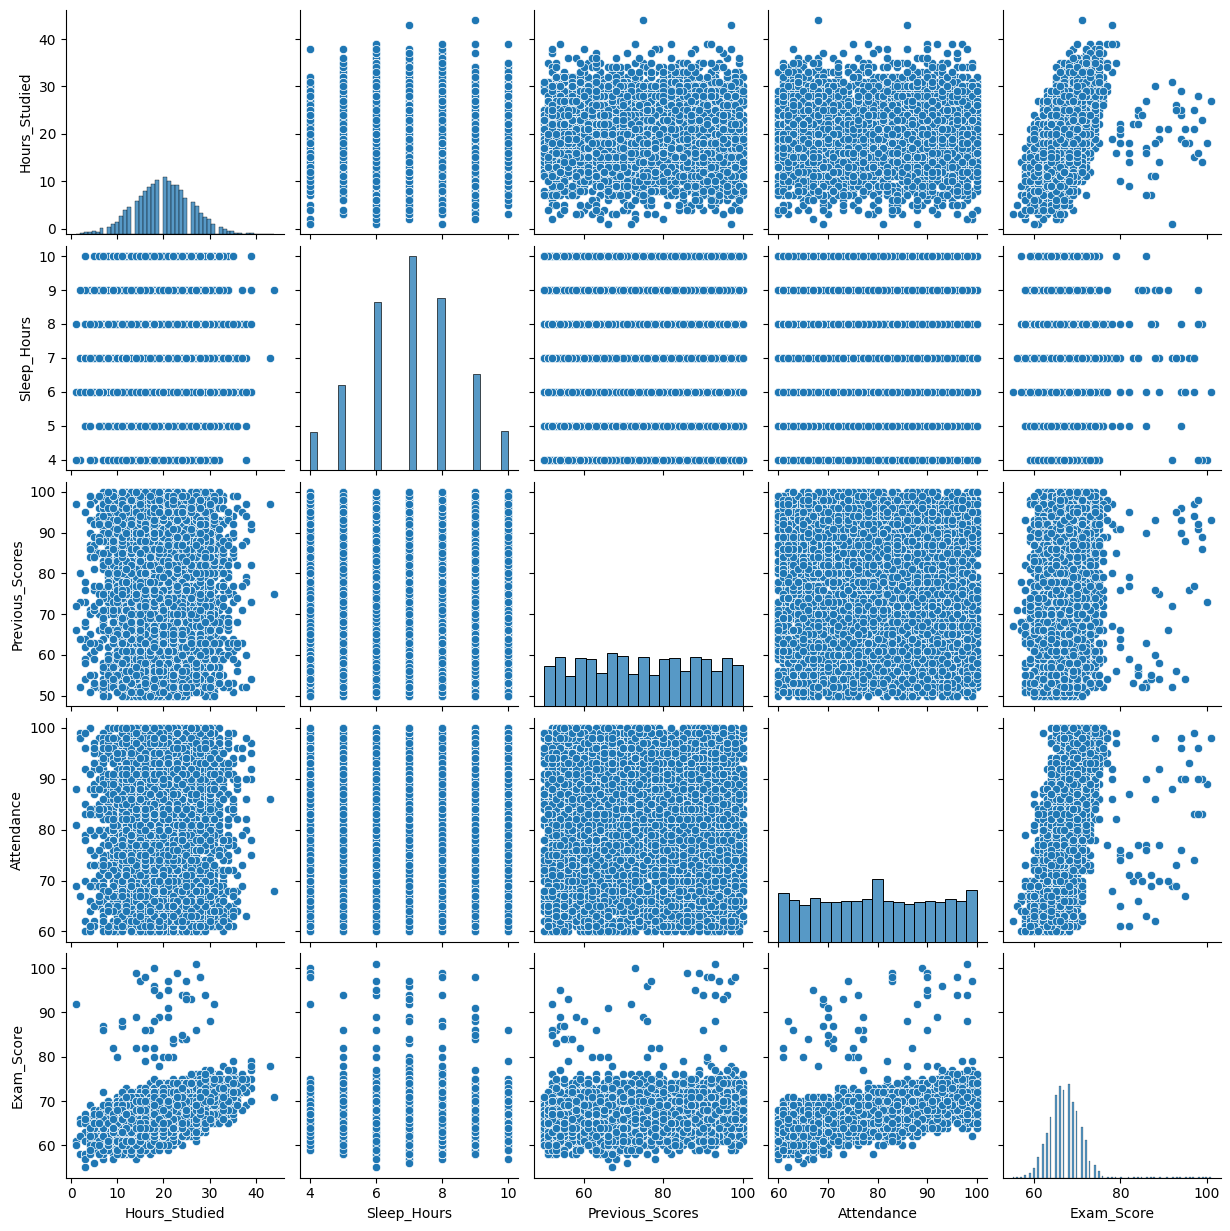


Linear Regression Results:
MSE: 12.259072858944165
R2 Score: 0.21109360482412964

Polynomial Regression (Degree=2) Results:
MSE: 12.288026103947953
R2 Score: 0.20923038071188227


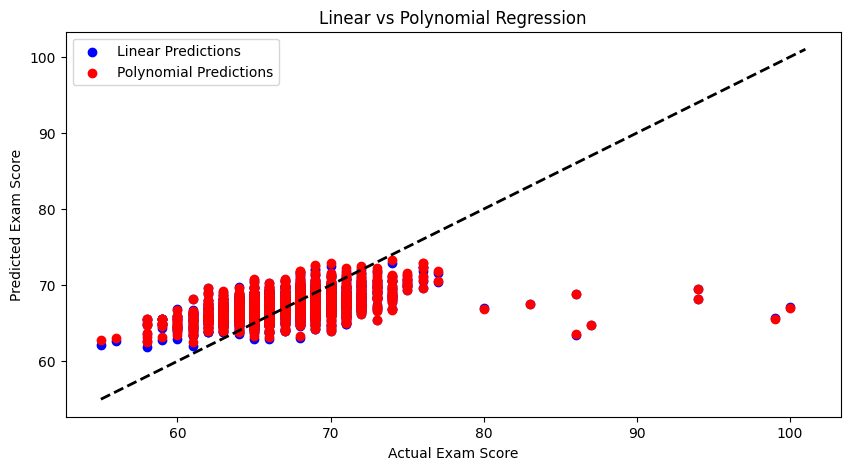


Linear Regression with Features: ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours', 'Motivation_Level']
MSE: 6.4992010639334925
R2 Score: 0.5817578260716407


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
print("Data Shape:", df.shape)
print(df.head())

# Cleaning
df = df.drop_duplicates().dropna()

# Encode categorical columns
label_enc = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Target variable
target = 'Exam_Score'

# Correlation Heatmap
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Student Performance Factors")
plt.show()

# Pairplot with selected numeric features
sns.pairplot(df[['Hours_Studied','Sleep_Hours','Previous_Scores','Attendance','Exam_Score']])
plt.show()

# Feature Selection
features = ['Hours_Studied', 'Sleep_Hours', 'Extracurricular_Activities']
X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("\nLinear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score:", r2_score(y_test, y_pred_lin))

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

print("\nPolynomial Regression (Degree=2) Results:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R2 Score:", r2_score(y_test, y_pred_poly))

# Visualization: Prediction Comparison
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lin, color='blue', label='Linear Predictions')
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

# Experiment with Different Features
alt_features = ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours', 'Motivation_Level']
X_alt = df[alt_features]

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y, test_size=0.2, random_state=42)
lin_reg_alt = LinearRegression()
lin_reg_alt.fit(X_train_alt, y_train_alt)
y_pred_alt = lin_reg_alt.predict(X_test_alt)

print("\nLinear Regression with Features:", alt_features)
print("MSE:", mean_squared_error(y_test_alt, y_pred_alt))
print("R2 Score:", r2_score(y_test_alt, y_pred_alt))
